/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       1,639,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,668,490 (6.36 MB)

 Trainable params: 1,668,490 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 146ms/step - accuracy: 0.8371 - loss: 0.5541 - val_accuracy: 0.9797 - val_loss: 0.0714
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.9755 - loss: 0.0781 - val_accuracy: 0.9744 - val_loss: 0.0863
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.9817 - loss: 0.0579 - val_accuracy: 0.9802 - val_loss: 0.0745
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9803 - val_loss: 0.0667
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 158ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9751 - val_loss: 0.0815
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 149ms/step - accuracy: 0.9876 - loss: 0.0401 - val_accuracy: 0.9802 - val_loss: 0.0746
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 149ms/step - accuracy: 0.9880 - loss: 0.0375 - val_accuracy: 0.9823 - val_loss: 0.0676
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 151ms/step - accuracy: 0.9896 - loss: 0

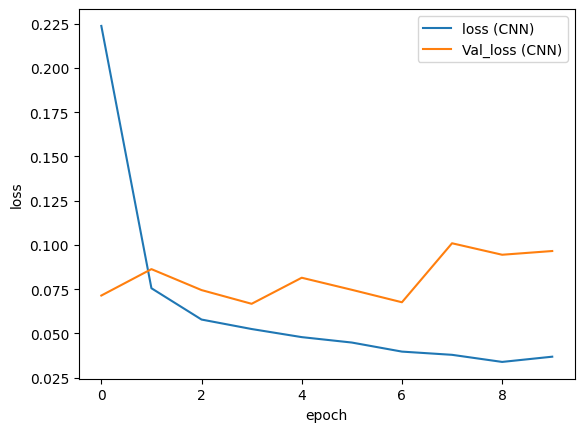

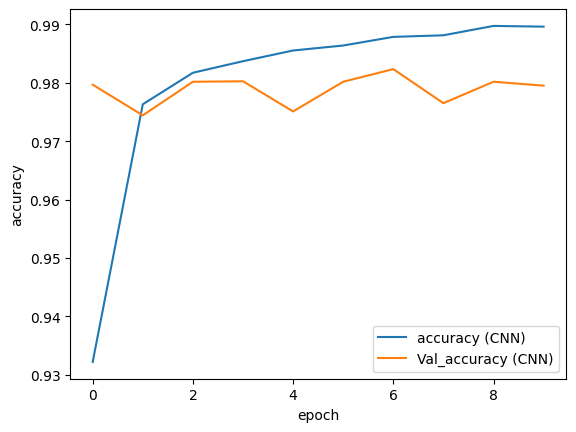

In [ ]:
import tensorflow as tf #딥러닝
from tensorflow import keras #고수준 API, 신경망 모델을 쉽게 구축하고 훈련
import matplotlib.pyplot as plt #데이터 시각화



(train_x, y_train), (test_x, test_y) = keras.datasets.mnist.load_data() # MNIST 손글씨 숫자(0~9) 데이터셋을 로드 / 훈련데이터와 레이블 / 검증데이터와 레이블
train_x = train_x[..., tf.newaxis] #train_x 데이터의 마지막 차원에 새로운 차원을 추가
test_x = test_x[..., tf.newaxis] #...: 생략된 차원인데, 모든 차원을 유지한다는 의미. / #tf.newaxis: 새로운 차원을 추가.

#MNIST는 2차원 배열인데 딥러닝 모델 인풋은 3차원 이상 텐서를 입력으로 받음 -> 그래서 10, 28, 28 을 10, 28, 28, 1 로 바꿔줌
x_train = train_x / 255. #입력 데이터를 0과 1 사이의 값으로 정규화 / 학습 속도를 향상시키고 모델의 성능을 개선하는 데 도움이 됨
x_test = test_x / 255.


# model.fit: 모델을 학습시킴
# x_train, y_train: 학습 데이터와 레이블을 지정
# epochs: 전체 데이터셋을 몇 번 반복하여 학습할지를 지정.
# batch_size: 한 번에 학습할 데이터의 개수를 지정.

#model.add =  Keras의 Sequential 모델에 새로운 층(layer)을 추가하는 메서드
#padding ='valid'패딩을 하지 않고, 합성곱 연산 결과로 출력되는 특징 맵의 크기가 입력 이미지보다 작아짐
#padding ='same': 출력 특징 맵의 크기가 입력 이미지와 동일하도록 패딩을 자동으로 계산하여 적용

model = keras.Sequential() #tf.keras.Sequential: 순차적인 모델을 정의
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1))) #컨볼 필터 사이즈3이 32개 + relu
#filters=32 : 필터개수, kernel_size=3 : 필터사이즈
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #풀링 2 , 슬라이드 2
#pool_size=(2,2),strides=(2,2) -> 2, strides=2 로 해도됨
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')) #컨볼 필터 사이즈64 3개 + relu
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #풀링 2 , 슬라이드 2

model.add(keras.layers.Flatten()) #컨볼루션된 데이터 넣기
model.add(keras.layers.Dense(units=1024, activation='relu')) #Affine + relu (히든)
model.add(keras.layers.Dense(units=10, activation='softmax')) #output 출력층으로, 10개의 클래스(0~9)에 대한 확률을 출력. softmax 활성화 함수를 사용하여 각 클래스에 대한 확률을 계산.

model.summary() #딥러닝 모델의 구조를 요약하여 출력 / 모델층별정보, 총파리미터수, 모델크기 등을 표로 출력해줌


# Adam
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9, #모멘텀, 값 크면 현 업데이트방향 영향력 커져서 학습이 안정적으로 진행, 값작으면 최근 업데이트방향 영향력 커져서 학습 빨라지지만 불안해질 수 있음.
    beta_2=0.999, # RMSprop 감쇠율임, 이전 기울기 제곱의 가중치를 조절, 큰값일수록 이전기울기 제곱 영향력상승, 작은값일수록 최근기울기 제곱 영향력상승
    epsilon=1e-07)

#1. Basic model 학습
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=10)

#validation : 모델 학습 시 데이터를 훈련 데이터와 검증 데이터로 나누는 비율을 설정하는 파라미터.
#이 값은 0.2로 설정되었으므로, 전체 데이터의 20%를 검증(validation) 데이터로 사용하고 나머지 80%를 훈련(train) 데이터로 사용
#모델 학습결과 시각화
#로스값
plt.plot(hist.history["loss"], label="loss (CNN)") #학습된 hist에서 loss 빼기
plt.plot(hist.history["val_loss"], label="Val_loss (CNN)") #학습된 hist에서 validation된 loss 빼기
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#정확도
plt.plot(hist.history["accuracy"], label="accuracy (CNN)")
plt.plot(hist.history["val_accuracy"], label="Val_accuracy (CNN)")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()





import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


(train_x, y_train), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]


x_train = train_x / 255.
x_test = test_x / 255.



model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1))) #컨볼 인풋
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #풀링
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')) #컨볼
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #풀링
model.add(keras.layers.Flatten()) #인풋
model.add(keras.layers.Dense(units=1024, activation='relu')) #히든
model.add(keras.layers.Dense(units=10, activation='softmax')) #아웃풋
model.summary()

#히든 노드 선언 model_batchnorm.add(keras.layers.Dense(128))
#배치           model_batchnorm.add(keras.layers.BatchNormalization())
#엑티베이션적용 model_batchnorm.add(keras.layers.ReLU())


adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=10)


plt.plot(hist.history["loss"], label="loss (CNN)") #학습된 hist에서 loss 빼기
plt.plot(hist.history["val_loss"], label="Val_loss (CNN)") #학습된 hist에서 validation된 loss 빼기
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"], label="accuracy (CNN)")
plt.plot(hist.history["val_accuracy"], label="Val_accuracy (CNN)")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


